# Trabajo Tiquetes de Avion con Logica Borrosa 

## Se importan las librerias

In [45]:
import numpy as np

In [46]:
import skfuzzy as fuzz

In [47]:
from skfuzzy import control as ctrl

In [48]:
import matplotlib.pyplot as plt

## Antecedentes o Entradas


### Se empiezan a crear las entradas a utilizar

**Cantidad de Personas:** Esta entrada Nos va a servir para que el sistemas mas adelante nos sugiera posibles descuentos dependiendo de la cantidad de personas, Se toman como máximo 6 personas para reserva de tiquetes.

**Presupuesto:** Esta entrada nos sirve para saber cuál va a ser el presupuesto del usuario en dolares, con un minimo de 100 y máximo de 999 dolares

**Comodidad:** Esta entrada es para saber que tanta comodidad en una escala de 1 al 10 busca el usuario

**Meses:** Esta entrada es para saber que más desea el viaje, esto nos permite saber que tipo de temporada es (Un total de 12 meses)

In [49]:
CantPersonas = ctrl.Antecedent(np.arange(0, 7, 1), 'Cantidad de Personas')

In [50]:
Presupuesto = ctrl.Antecedent(np.arange(100,1050,50), 'Presupuesto')

In [51]:
Comodidad = ctrl.Antecedent(np.arange(1,11, 1), 'Comodidad')

In [52]:
Meses = ctrl.Antecedent(np.arange(0, 13, 1), 'Meses')

## Consecuencias o Salidas

### Se crean las salidas

**Aumento:** Esta salida nos arroja un valor de porcentaje para saber cuánto aumentó sugiere el sistema por temporada alta

**Clase:** Esta salida dependiendo del presupuesto y comodidad del usuario nos arroja el tipo de clase que sugiere el sistema

**Descuento:** Esta salida nos arroja un descuento por la cantidad de personas que van a comprar el tiquete

**SinDescuento:** Esta salida nos arroja descuento muy bajos por el tipo de temporada

In [53]:
Aumento = ctrl.Consequent(np.arange(0, 21, 1), 'Aumento Temporada Alta')

In [54]:
Clase = ctrl.Consequent(np.arange(1, 4, 1), 'Clase')

In [55]:
Descuento = ctrl.Consequent(np.arange(0, 11, 1), 'Descuento')

In [56]:
SinDescuento = ctrl.Consequent(np.arange(0, 2, 1), 'Baja')

## Funciones de Membresia o Pertenencia

### Se crean las Funciones de membresía

**Presupuesto:** Esta función de pertenencia nos dice que el presupuesto es Poco cuando va de 100 a 300, _demo_ cuando va de 301-600 y Mucho cuando va de 601 - 1000

**Comodidad:** Esta función de pertenencia nos dice que la comodidad está en un rango de Poca,Media,Mucha con valores de 1-3 3-6 6-10 respectivamente

**Clase:** Esta función de pertenencia nos dice que hay 3 tipos de clases Ejecutiva,Económica y Primera Clase con valores de 1-2-3 respectivamente

**CantPersonas:** Esta función de pertenencia se auto completa con .autofm() (Tiene 3 valores: 3,5,7) En este caso utilizamos el valor 5 que nos dice que tienen 5 rangos los cuales son: poor,mediocre,average,decent,good

**Meses:** Esta función de pertenencia es para los meses del 1-12 (Enero,febrero...)

**Aumento:** Esta función de pertenencia nos dice que hay un aumento en porcentaje del 0-15%

**SinDescuento:**  Esta función nos dice que hay un descuento muy pequeño (0-1%)

**Descuento:** Esta función de pertenencia nos dice que hay 3 tipos de descuentos bajo medio y alto.

In [57]:
Presupuesto['Poco'] = fuzz.trimf(Presupuesto.universe, [100,100,300])
Presupuesto['Medio'] = fuzz.trimf(Presupuesto.universe, [301,301,600])
Presupuesto['Mucho'] = fuzz.trimf(Presupuesto.universe, [601,601,1000])

In [58]:
Comodidad['Poca'] = fuzz.trimf(Comodidad.universe, [1,1,3])
Comodidad['Media'] = fuzz.trimf(Comodidad.universe, [3,3,6])
Comodidad['Mucha'] = fuzz.trimf(Comodidad.universe, [6,6,10])

In [59]:
Clase['Economica'] = fuzz.trimf(Clase.universe, [1,1,1])
Clase['Ejecutiva'] = fuzz.trimf(Clase.universe, [2,2,2])
Clase['Primera Clase'] = fuzz.trimf(Clase.universe, [3,3,3])

In [60]:
CantPersonas.automf(5)

In [61]:
Meses['Enero']= fuzz.trimf(Meses.universe, [0,0,1])
Meses['Febrero']= fuzz.trimf(Meses.universe, [0,0,2])
Meses['Marzo']= fuzz.trimf(Meses.universe, [0,0,3])
Meses['Abril']= fuzz.trimf(Meses.universe, [0,0,4])
Meses['Mayo']= fuzz.trimf(Meses.universe, [0,0,5])
Meses['Junio']= fuzz.trimf(Meses.universe, [0,0,6])
Meses['Julio']= fuzz.trimf(Meses.universe, [0,0,7])
Meses['Agosto']= fuzz.trimf(Meses.universe, [0,0,8])
Meses['Septiembre']= fuzz.trimf(Meses.universe, [0,0,9])
Meses['Octubre']= fuzz.trimf(Meses.universe, [0,0,10])
Meses['Noviembre']= fuzz.trimf(Meses.universe, [0,0,11])
Meses['Diciembre']= fuzz.trimf(Meses.universe, [0,0,12])

In [62]:
Aumento['Alto'] = fuzz.trimf(Aumento.universe, [0,0,15])

In [63]:
SinDescuento['Ninguno'] = fuzz.trimf(SinDescuento.universe, [0,1,1])

In [64]:
Descuento['Bajo'] = fuzz.trimf(Descuento.universe, [0,0,3])
Descuento['Medio'] = fuzz.trimf(Descuento.universe, [0,3,10])
Descuento['Alto'] = fuzz.trimf(Descuento.universe, [3,10,10])

## Reglas

**Rule2**: Si la cantidad de personas es POOR o MEDIOCRE el descuento es BAJO

**Rule3**: Si la cantidad de personas es DECENT O AVERAGE el descuento es MEDIO

**Rule4**: Si la cantidad de personas es GOOD el descuento es ALTO

**Rule5**: Si los meses son: Enero o Febrero o Noviembre o Diciembre el Aumento es ALTO

**Rule6**: Si los meses son: Marzo o Abril o Mayo o Junio o Julio o Agosto o Septiembre o Octubre no tiene descuento significativo (Sindescuento)

**Rule7**: Si el presupuesto es POCO o la comodidad es POCA la clase sugerida es ECONOMICA

**Rule8**: Si el presupuesto es MEDIO o la comodidad es MEDIA la clase sugerida es EJECUTIVA

**Rule9**: Si el presupuesto es MUCHO o la comodidad es MUCHA la clase sugerida es Primera Clase

In [65]:
rule2 = ctrl.Rule(CantPersonas['poor'] | CantPersonas['mediocre']  , Descuento['Bajo'])
rule3 = ctrl.Rule(CantPersonas['decent'] | CantPersonas['average'], Descuento['Medio'])
rule4 = ctrl.Rule(CantPersonas['good'], Descuento['Alto'])
rule5 = ctrl.Rule(Meses['Enero'] | Meses['Febrero'] | Meses['Noviembre'] | Meses['Diciembre'], Aumento['Alto'])
rule6 = ctrl.Rule(Meses['Marzo'] | Meses['Abril'] | Meses['Mayo'] | Meses['Junio'] | 
                 Meses['Julio'] | Meses['Agosto'] | Meses['Septiembre'] | Meses['Octubre'] , SinDescuento['Ninguno'])
rule7 = ctrl.Rule(Presupuesto['Poco'] | Comodidad['Poca'] , Clase['Economica'])
rule8 = ctrl.Rule(Presupuesto['Medio'] | Comodidad['Media'] , Clase['Ejecutiva'])
rule9 = ctrl.Rule(Presupuesto['Mucho'] | Comodidad['Mucha'] , Clase['Primera Clase'])

A:\Users\Steven\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


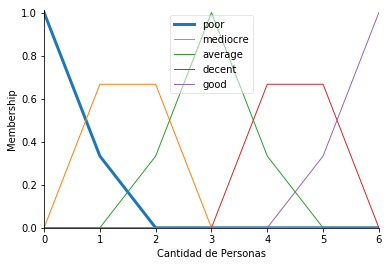

In [66]:
CantPersonas['poor'].view()

A:\Users\Steven\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


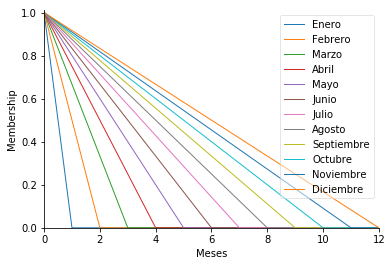

In [67]:
Meses.view()

A:\Users\Steven\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


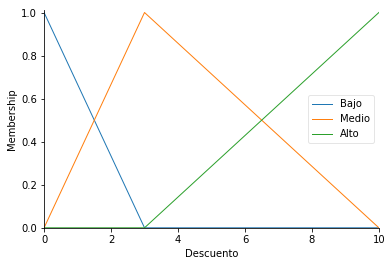

In [68]:
Descuento.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fe523025c0>)

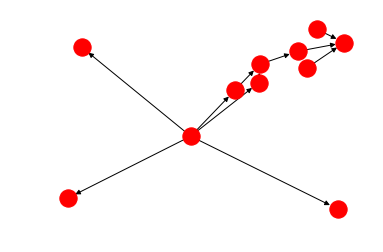

In [69]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fe5235b630>)

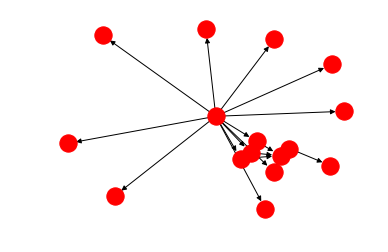

In [70]:
rule5.view()

## Se crea el Sistema de Control y Simulación


Creamos a ControlSystemSimulation. Se puede pensar en este objeto como que representa un controlodor aplicado a un conjunto especfico de circunstancias. 

Se dividió en diferentes Partes debido a que dependiendo de la regla tienen diferentes entradas.

#### Reglas 2 3 4

In [71]:
Descuentos_ctrl = ctrl.ControlSystem([rule2,rule3,rule4])

In [72]:
Descuentos = ctrl.ControlSystemSimulation(Descuentos_ctrl)

#### Regla 5

In [73]:
Aumentos_ctrl = ctrl.ControlSystem([rule5])

In [74]:
Aumentos = ctrl.ControlSystemSimulation(Aumentos_ctrl)

#### Regla 6

In [75]:
NoDescuento_ctrl = ctrl.ControlSystem([rule6])

In [76]:
NoDescuento = ctrl.ControlSystemSimulation(NoDescuento_ctrl)

#### Regla 7,8,9

In [77]:
Clases_ctrl = ctrl.ControlSystem([rule7,rule8,rule9])

In [78]:
Clases = ctrl.ControlSystemSimulation(Clases_ctrl)

### Inputs

In [79]:
Descuentos.input['Cantidad de Personas'] = 2

In [80]:
Aumentos.input['Meses'] = 3

In [81]:
NoDescuento.input['Meses'] = 3

In [82]:
Clases.input['Comodidad'] = 8

In [83]:
Clases.input['Presupuesto'] = 800

### Procesamos los numeros

In [84]:
Descuentos.compute()
Aumentos.compute()
NoDescuento.compute()
Clases.compute()

### Podemos ver el resultado y su grafica

3.910394265232974


A:\Users\Steven\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


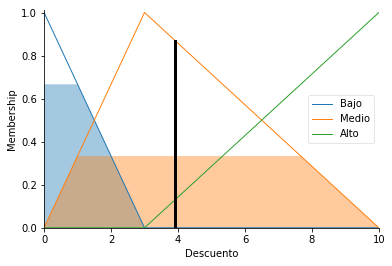

In [85]:
print (Descuentos.output['Descuento'])
Descuento.view(sim=Descuentos)

5.249999999999998


A:\Users\Steven\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


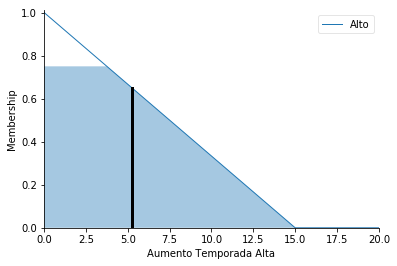

In [86]:
print (Aumentos.output['Aumento Temporada Alta'])
Aumento.view(sim=Aumentos)

0.6435897435897436


A:\Users\Steven\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


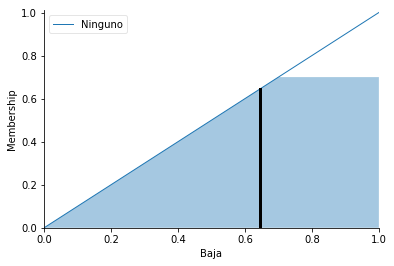

In [87]:
print (NoDescuento.output['Baja'])
SinDescuento.view(sim=NoDescuento)

2.6113430175215067


A:\Users\Steven\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


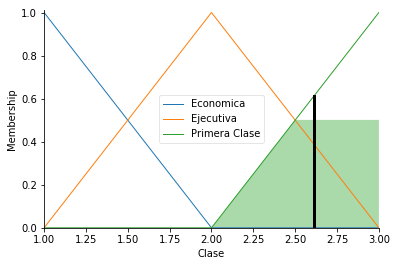

In [88]:
print (Clases.output['Clase'])
Clase.view(sim=Clases)